___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print("You can safely ignore this message.")

You can safely ignore this message.


In [2]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [3]:
import tensorflow as tf

if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this Assignment.")
else:
    print("CPU will be used for this Assignment.")

CPU will be used for this Assignment.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_auc_score

# Uncomment the following lines if you want to suppress warnings:
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it to None to display all rows in the dataframe:
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe:
pd.set_option("display.max_columns", None)

In [5]:
def seedsetter():
    SEED = 42
    import os
    import random
    os.environ["TF_DETERMINISTIC_OPS"] = "1"
    tf.keras.utils.set_random_seed(SEED)
    os.environ['PYTHONHASHSEED']=str(SEED)
    random.seed(SEED)
    np.random.seed(SEED)
    tf.random.set_seed(SEED)

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [6]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
from sklearn.model_selection import train_test_split
#split data for validation
X_train, X_val, y_train, y_val = train_test_split(
  X_train, y_train, stratify=y_train, test_size=0.10, random_state=42
)

In [8]:
print(f"There are {len(X_train)} images in the X training dataset")
print(f"There are {len(y_train)} images in the y training dataset")
print(f"There are {len(X_test)} images in the X test dataset")
print(f"There are {len(y_test)} images in the y test dataset")
print(f"There are {len(X_val)} images in the X validation dataset")
print(f"There are {len(y_val)} images in the y validation dataset")

There are 54000 images in the X training dataset
There are 54000 images in the y training dataset
There are 10000 images in the X test dataset
There are 10000 images in the y test dataset
There are 6000 images in the X validation dataset
There are 6000 images in the y validation dataset


In [9]:
# Checking the shape of one image
X_train[200].shape

(28, 28)

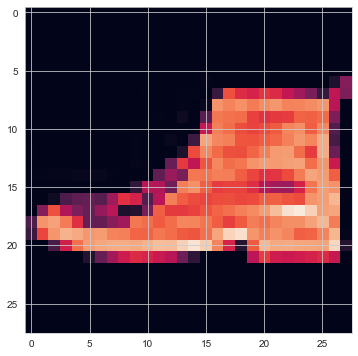

In [10]:
plt.imshow(X_train[10])

<AxesSubplot:>

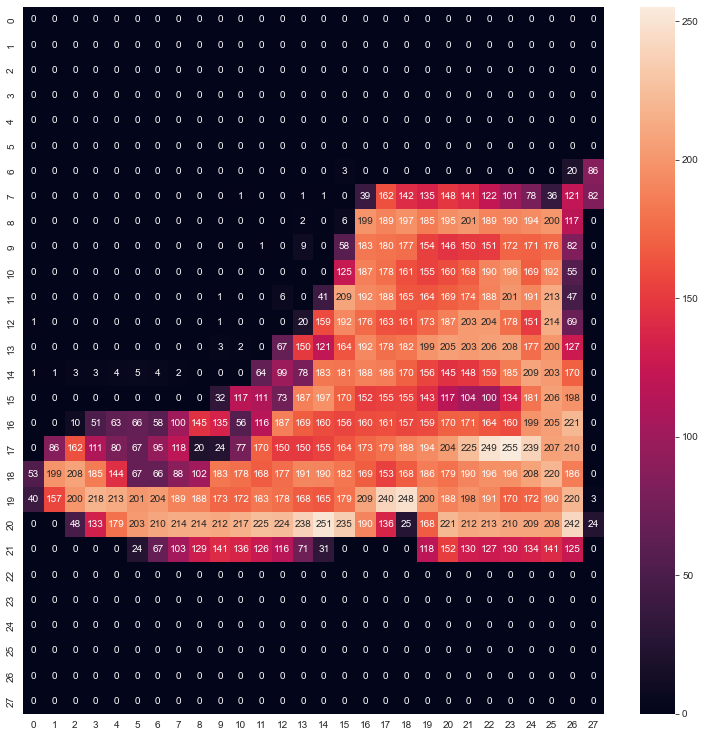

In [11]:
plt.figure(figsize=(13, 13))
sns.heatmap(X_train[10], annot=True, fmt=".3g")
#we can see the pixcels in the image

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [12]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

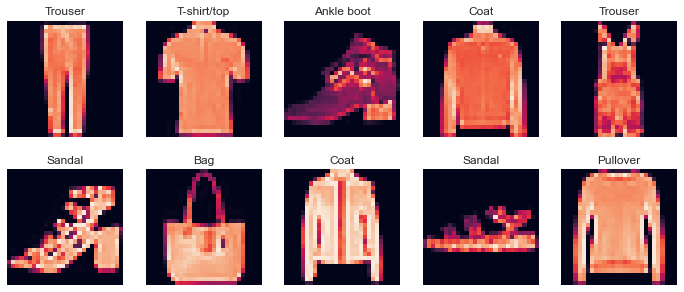

In [13]:
f, axes = plt.subplots(2, 5, figsize=(12, 5))
#We have 10 classes 
for ax in axes.ravel():
    idx = np.random.randint(0, len(X_train))
    ax.axis("off")
    ax.set_title(classes[y_train[idx]])
    ax.imshow(X_train[idx])
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [14]:
X_train[10].min()

0

In [15]:
X_train[10].max()

255

In [16]:
# Normalize image pixels from 0-255 to 0-1
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_val = X_val.astype("float32")
X_train /= 255
X_test /= 255
X_val /= 255

In [17]:
X_train[10].min()

0.0

In [18]:
X_train[10].max()

1.0

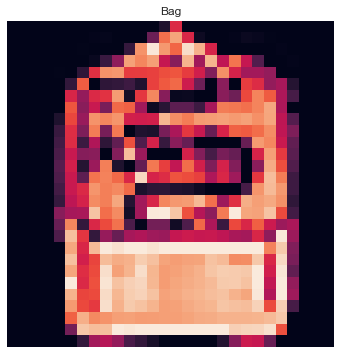

In [19]:
plt.imshow(X_train[9])
plt.title(classes[y_train[9]])
plt.axis("off")
plt.show()

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [20]:
X_train.shape, X_test.shape, X_val.shape

((54000, 28, 28), (10000, 28, 28), (6000, 28, 28))

In [21]:
np.expand_dims(X_train, 3).shape

(54000, 28, 28, 1)

In [23]:
X_train = np.expand_dims(X_train, 3)
X_test = np.expand_dims(X_test, 3)
X_val = np.expand_dims(X_val, 3)
#Reshape the X arrays to include a 4 dimension of the single channel

In [24]:
X_train.shape, X_test.shape, X_val.shape

((54000, 28, 28, 1), (10000, 28, 28, 1), (6000, 28, 28, 1))

In [25]:
y_train

array([8, 9, 8, ..., 6, 1, 9], dtype=uint8)

In [26]:
y_train.shape

(54000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [27]:
from tensorflow.keras.utils import to_categorical

In [28]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_val = to_categorical(y_val, 10)
Y_train.shape

(54000, 10)

In [29]:
y_train[9]

8

In [30]:
Y_train[9]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,MaxPooling2D, Flatten,Dropout

In [32]:
#Model 1
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3),padding='same', input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2),strides=(1,1)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 20412)             0         
                                                                 
 dense (Dense)               (None, 128)               2612864   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,614,434
Trainable params: 2,614,434
Non-trainable params: 0
______________________________________________

In [36]:
#Model 2
model2 = Sequential()

model2.add(Conv2D(filters=28, kernel_size=(3,3),padding='same', input_shape=(28, 28, 1), activation='relu'))
model2.add(MaxPool2D(pool_size=(2, 2),strides=(1,1)))

model2.add(Flatten())
model2.add(Dropout(0.3))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [37]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 27, 27, 28)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 20412)             0         
                                                                 
 dropout (Dropout)           (None, 20412)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               2612864   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                      

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(
    monitor="val_accuracy", mode="max", patience=4, restore_best_weights=True
)

In [36]:
#Model 1
model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_val, Y_val),
    callbacks=[early_stop],
)

Epoch 1/50
1688/1688 [==============================] - 70s 41ms/step - loss: 0.3854 - accuracy: 0.8643 - val_loss: 0.2612 - val_accuracy: 0.9053
Epoch 2/50
1688/1688 [==============================] - 72s 43ms/step - loss: 0.2540 - accuracy: 0.9075 - val_loss: 0.2323 - val_accuracy: 0.9152
Epoch 3/50
1688/1688 [==============================] - 69s 41ms/step - loss: 0.2114 - accuracy: 0.9224 - val_loss: 0.2305 - val_accuracy: 0.9180
Epoch 4/50
1688/1688 [==============================] - 71s 42ms/step - loss: 0.1790 - accuracy: 0.9348 - val_loss: 0.2653 - val_accuracy: 0.9067
Epoch 5/50
1688/1688 [==============================] - 71s 42ms/step - loss: 0.1552 - accuracy: 0.9438 - val_loss: 0.2483 - val_accuracy: 0.9130
Epoch 6/50
1688/1688 [==============================] - 71s 42ms/step - loss: 0.1347 - accuracy: 0.9508 - val_loss: 0.2454 - val_accuracy: 0.9192
Epoch 7/50
1688/1688 [==============================] - 72s 42ms/step - loss: 0.1167 - accuracy: 0.9591 - val_loss: 0.2438 -

In [58]:
#Model 2
model2.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_val, Y_val),
    callbacks=[early_stop],
)

Epoch 1/50
1688/1688 [==============================] - 124s 73ms/step - loss: 0.4543 - accuracy: 0.8414 - val_loss: 0.3174 - val_accuracy: 0.8847
Epoch 2/50
1688/1688 [==============================] - 138s 82ms/step - loss: 0.3229 - accuracy: 0.8849 - val_loss: 0.2665 - val_accuracy: 0.9028
Epoch 3/50
1688/1688 [==============================] - 150s 89ms/step - loss: 0.2943 - accuracy: 0.8960 - val_loss: 0.2736 - val_accuracy: 0.8967
Epoch 4/50
1688/1688 [==============================] - 148s 88ms/step - loss: 0.2821 - accuracy: 0.9000 - val_loss: 0.2478 - val_accuracy: 0.9093
Epoch 5/50
1688/1688 [==============================] - 146s 86ms/step - loss: 0.2722 - accuracy: 0.9044 - val_loss: 0.2382 - val_accuracy: 0.9180
Epoch 6/50
1688/1688 [==============================] - 141s 84ms/step - loss: 0.2659 - accuracy: 0.9080 - val_loss: 0.2610 - val_accuracy: 0.9055
Epoch 7/50
1688/1688 [==============================] - 156s 92ms/step - loss: 0.2548 - accuracy: 0.9109 - val_loss: 0

In [37]:
model.metrics_names

['loss', 'accuracy']

In [59]:
model2.metrics_names

['loss', 'accuracy']

In [38]:
summary = pd.DataFrame(model.history.history)
summary.head()
#Model1

,loss,accuracy,val_loss,val_accuracy
0,0.385,0.864,0.261,0.905
1,0.254,0.908,0.232,0.915
2,0.211,0.922,0.231,0.918
3,0.179,0.935,0.265,0.907
4,0.155,0.944,0.248,0.913


In [61]:
summary2 = pd.DataFrame(model2.history.history)
summary2.head()
#Model2

,loss,accuracy,val_loss,val_accuracy
0,0.454,0.841,0.317,0.885
1,0.323,0.885,0.266,0.903
2,0.294,0.896,0.274,0.897
3,0.282,0.900,0.248,0.909
4,0.272,0.904,0.238,0.918


**TASK 7: Plot values of metrics you used in your model.**

### Model 1

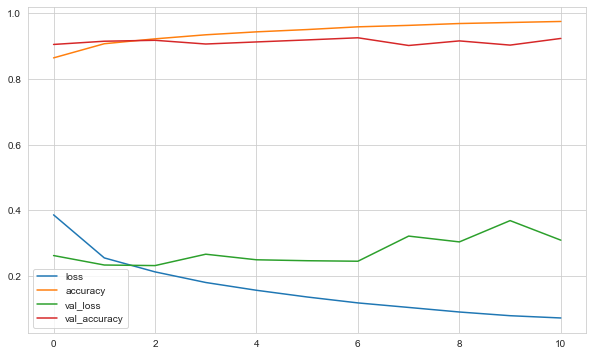

In [39]:
summary.plot();
#model1

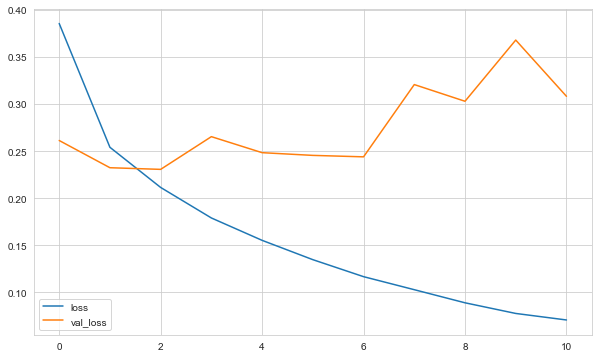

In [40]:
summary[["loss", "val_loss"]].plot();

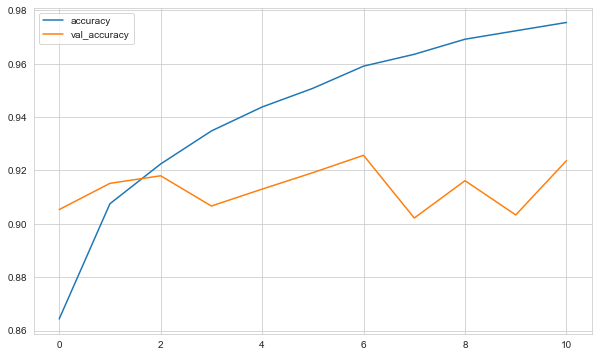

In [41]:
summary[["accuracy", "val_accuracy"]].plot();

-For this model i get overfitting as shown in the figure above

### Model 2

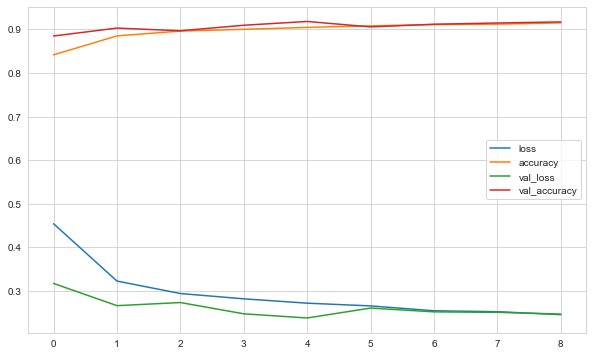

In [62]:
summary2.plot();
#Model2

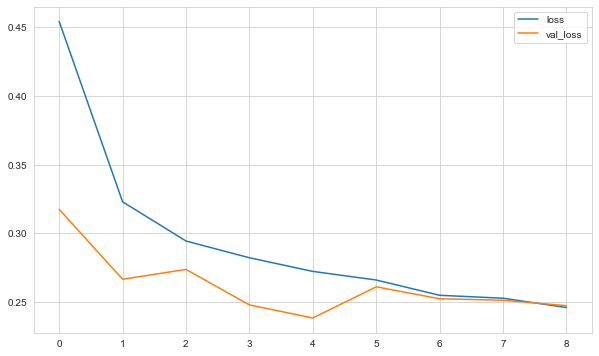

In [63]:
summary2[["loss", "val_loss"]].plot();

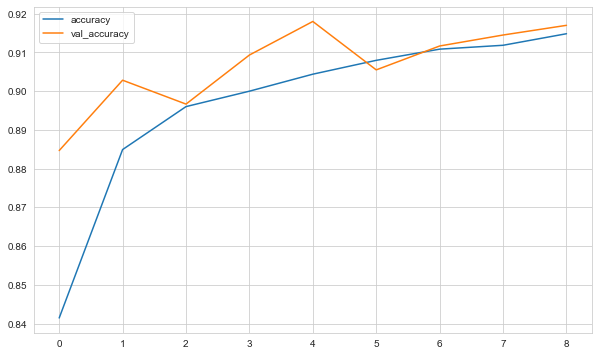

In [64]:
summary2[["accuracy", "val_accuracy"]].plot();

-I get good result without overfitting by using Dropout layer

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [42]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    multilabel_confusion_matrix,
)

### Model 1 

313/313 [==============================] - 3s 10ms/step
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1000
           1       0.98      0.99      0.98      1000
           2       0.84      0.88      0.86      1000
           3       0.92      0.92      0.92      1000
           4       0.87      0.84      0.85      1000
           5       0.97      0.98      0.98      1000
           6       0.79      0.74      0.76      1000
           7       0.95      0.97      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

-------------------------------------------------------------


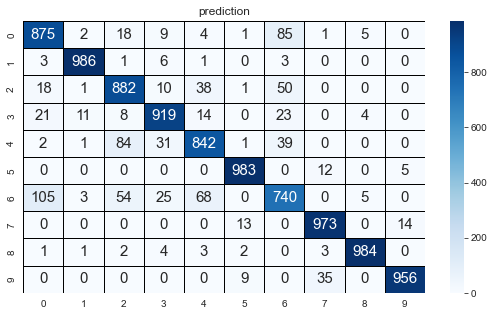

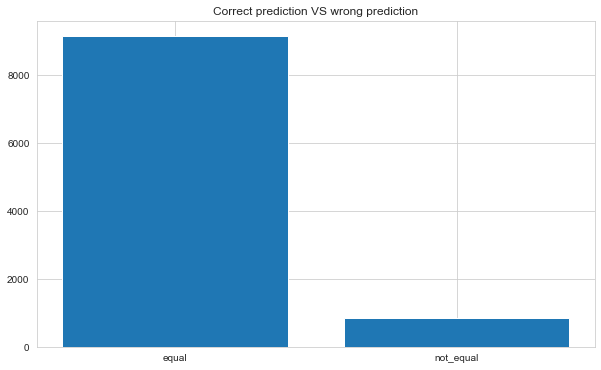

In [43]:
pred_prob = model.predict(X_test)
y_pred = np.argmax(pred_prob, axis=1)
print(classification_report(y_test, y_pred))
print("-------------------------------------------------------------")
plt.figure(figsize=(9, 5))
sns.heatmap(
        confusion_matrix(y_test, y_pred),
        annot=True,
        cmap="Blues",
        linewidths=0.5,
        linecolor="black",
        fmt="g",
        annot_kws={"size": 15},)
plt.title("prediction")
plt.show();
print("\n")
equal = np.equal(y_test, y_pred).sum()
not_equal= np.not_equal(y_test, y_pred).sum()
plt.bar(['equal','not_equal'] , [equal,not_equal] )
plt.title("Correct prediction VS wrong prediction")
plt.show();

In [44]:
np.not_equal(y_test, y_pred)

array([False, False, False, ..., False, False, False])

In [45]:
np.not_equal(y_test, y_pred).sum()

860

In [46]:
np.equal(y_test, y_pred).sum()

9140

### Model 2 

313/313 [==============================] - 3s 10ms/step
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1000
           1       0.98      0.99      0.98      1000
           2       0.88      0.82      0.85      1000
           3       0.89      0.93      0.91      1000
           4       0.83      0.88      0.85      1000
           5       0.97      0.99      0.98      1000
           6       0.78      0.69      0.73      1000
           7       0.97      0.95      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

-------------------------------------------------------------


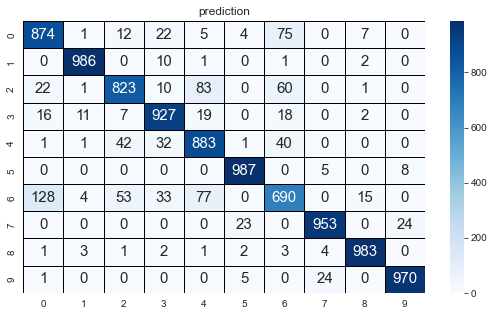

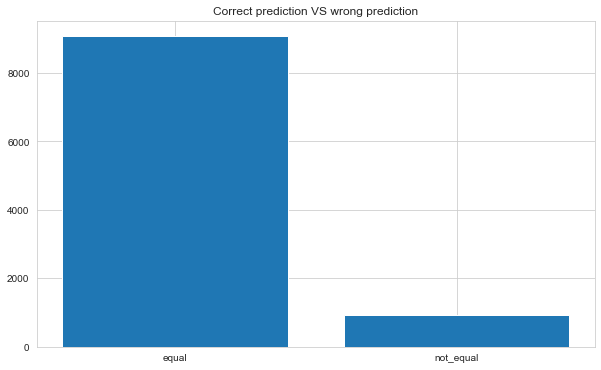

In [65]:
pred_prob = model2.predict(X_test)
y_pred = np.argmax(pred_prob, axis=1)
print(classification_report(y_test, y_pred))
print("-------------------------------------------------------------")
plt.figure(figsize=(9, 5))
sns.heatmap(
        confusion_matrix(y_test, y_pred),
        annot=True,
        cmap="Blues",
        linewidths=0.5,
        linecolor="black",
        fmt="g",
        annot_kws={"size": 15},)
plt.title("prediction")
plt.show();
print("\n")
equal = np.equal(y_test, y_pred).sum()
not_equal= np.not_equal(y_test, y_pred).sum()
plt.bar(['equal','not_equal'] , [equal,not_equal] )
plt.title("Correct prediction VS wrong prediction")
plt.show();

In [66]:
np.not_equal(y_test, y_pred)

array([False, False, False, ..., False, False, False])

In [67]:
np.not_equal(y_test, y_pred).sum()

924

In [68]:
np.equal(y_test, y_pred).sum()

9076

## Prediction

In [47]:
# Define the mapping from numeric values to class labels
class_mapping = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

# Numeric data to be mapped
numeric_data = [0, 5, 3, 8, 1, 4, 9, 2, 7, 6]

# Map the numeric data to categorical labels
categorical_data = [class_mapping[num] for num in numeric_data]

# Print the resulting categorical data
print(categorical_data)


['T-shirt/top', 'Sandal', 'Dress', 'Bag', 'Trouser', 'Coat', 'Ankle boot', 'Pullover', 'Sneaker', 'Shirt']


In [48]:
my_number = X_test[20]

In [49]:
my_number.shape

(28, 28, 1)

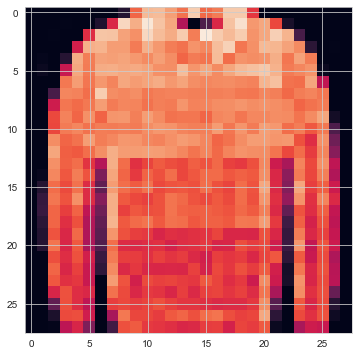

In [50]:
plt.imshow(my_number)
plt.show()

In [51]:
np.expand_dims(my_number, 0).shape

(1, 28, 28, 1)

### Model 1 prediction

In [52]:
pred_prob = model.predict(np.expand_dims(my_number, 0))
pred_prob

1/1 [==============================] - 0s 29ms/step


array([[2.5354427e-06, 2.2142038e-10, 9.9978155e-01, 3.9034390e-10,
        6.5328342e-05, 3.2960184e-12, 1.4971443e-04, 5.9919643e-08,
        6.3916019e-08, 7.1422744e-07]], dtype=float32)

In [53]:
y_pred = np.argmax(pred_prob)
print("Value Prediction:", y_pred)
categorical_prediction = class_mapping.get(y_pred, "Unknown")

# Print the resulting categorical prediction
print("Categorical Prediction:", categorical_prediction)

Value Prediction: 2
Categorical Prediction: Pullover


-Right prediction

### Model 2 prediction 

In [69]:
pred_prob = model2.predict(np.expand_dims(my_number, 0))
pred_prob

1/1 [==============================] - 0s 30ms/step


array([[1.9709093e-03, 2.5100322e-09, 9.9455088e-01, 1.7807902e-06,
        3.0474871e-04, 2.7247737e-10, 3.1396360e-03, 8.7800771e-09,
        3.2111548e-05, 5.2166889e-09]], dtype=float32)

In [70]:
y_pred = np.argmax(pred_prob)
print("Value Prediction:", y_pred)
categorical_prediction = class_mapping.get(y_pred, "Unknown")

# Print the resulting categorical prediction
print("Categorical Prediction:", categorical_prediction)

Value Prediction: 2
Categorical Prediction: Pullover


-Right prediction

In [71]:
model.save("cnn-3.h5")

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___